In [ ]:
import pandas as pd
import re
from TranscriptPlotter import TranscriptPlotter
%load_ext autoreload
%autoreload 2

In [ ]:
tp = TranscriptPlotter('./test.txt')
tp.parse()
tp.plot()

In [ ]:
df = pd.DataFrame({'person': tp.title_list, 'lines': tp.content_list})

# remove things with parentheses like (PAUSE), (BREAK), and other cut off phrases
df = df[~df['person'].str.contains(r'^\(.*\)$')]
# remove page numbers
df = df[~df['person'].str.contains(r'\d+\.')]
# remove indicators that end with :
df = df[~df['person'].str.endswith(':')]
# take first word of each title phrase (cleans things like 'Mark (V.O)', replaces with 'Mark')
df['person'] = df['person'].apply(lambda p: p.strip().split(' ')[0])
# remove common non-character operations, which all end with . for the fist word (like INT.)
df = df[~df['person'].str.endswith('.')]
# if not in top 20 list of chars, then don't include, used to exclude any outliers
top_20 = df['person'].value_counts()[:20]
df = df[df['person'].isin(top_20.keys())]
df

In [ ]:
with open("test.txt", "r", encoding="utf-8") as f:
    text = f.read()
    
# Roughly speaking, 
# <b> TITLE </b> content <b> TITLE2 </b> content2 <b> ...
# 1. split by <b>
# 2. strip and remove spacing (removes outer edges + strange transitions)
# 3. For each in list, split by </b>
# 4. strip and remove spacing, should have only two items
# 5. add two items correspondingly to dataframe

titles = []
contents = []

chunks = re.split(r"<b>", text)
chunks = list(filter(lambda c: c, [c.strip() for c in chunks]))
for c in chunks:
    unparsed_line = re.split(r"<\/b>", c)
    parsed_line = [l.strip() for l in unparsed_line]
    titles.append(parsed_line[0])
    contents.append(parsed_line[1])

new_df = pd.DataFrame({'title': titles, 'content': contents})
new_df


    

In [33]:
from TranscriptPlotter import TranscriptPlotter
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


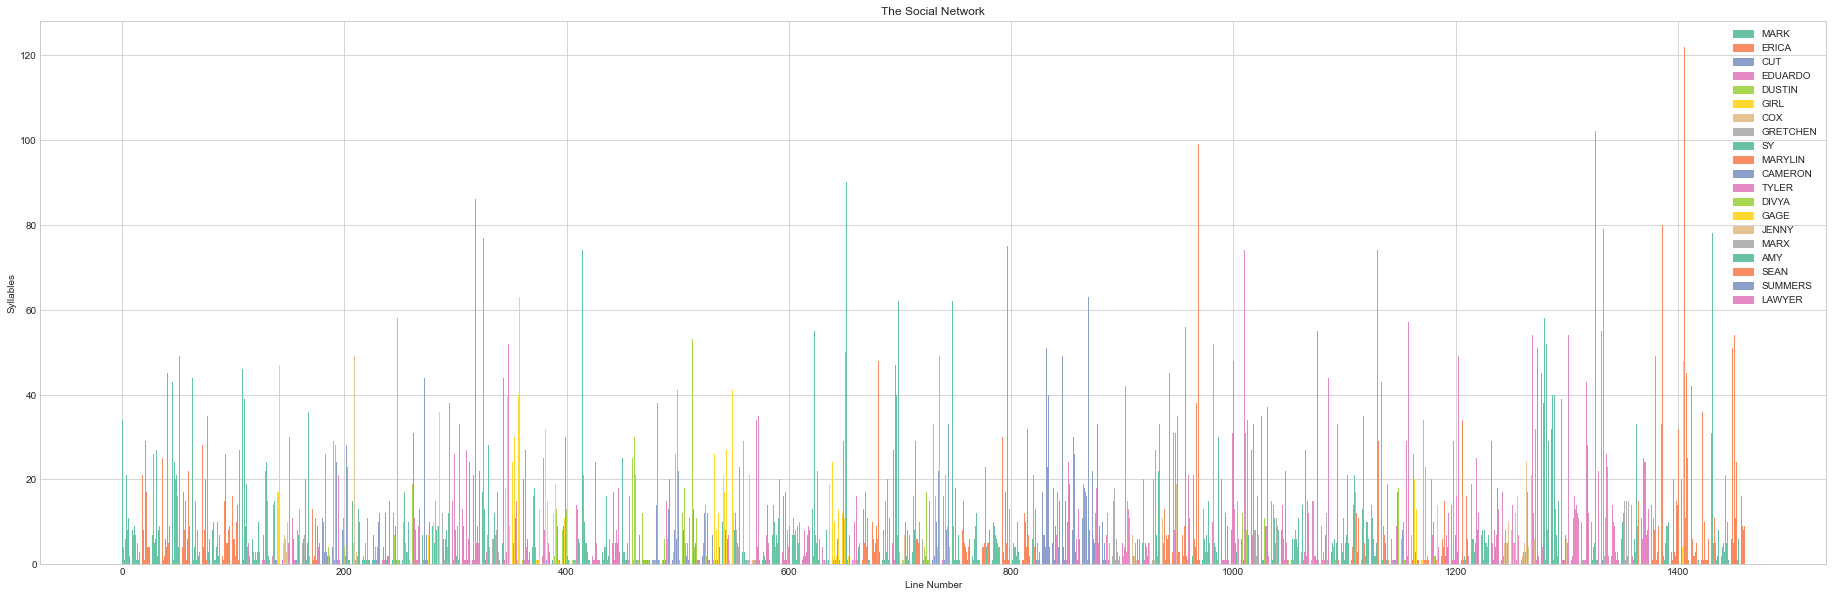

In [35]:
tp = TranscriptPlotter('./test.txt')
tp.convert_to_plot()